In [149]:
# Data visualization
import Bio.SeqIO

for i, record in enumerate(Bio.SeqIO.parse("data/PF00440_rp15.txt", "fasta")):
    if i % 1000 == 0:
        print(i)
        print(record)
        print(str(record.description),":",str(record.seq))

0
ID: A0A2H5ZBW7/12-58
Name: A0A2H5ZBW7/12-58
Description: A0A2H5ZBW7/12-58
Number of features: 0
Seq('ILAAA-L-E-L-F-L-S--E-----G--Y-E-----A-A--TVRA-----IGRR...EAL')
A0A2H5ZBW7/12-58 : ILAAA-L-E-L-F-L-S--E-----G--Y-E-----A-A--TVRA-----IGRRA----G---V-S--D-S-A--LY-Y-Y-F-----E--SKAAILEAL
1000
ID: A0A0C7NWV7/17-60
Name: A0A0C7NWV7/17-60
Description: A0A0C7NWV7/17-60
Number of features: 0
Seq('IMDAA-E-K-L-F-I-Q--K-----G--Y-Q-----N-T--TMTE-----IAKK...---')
A0A0C7NWV7/17-60 : IMDAA-E-K-L-F-I-Q--K-----G--Y-Q-----N-T--TMTE-----IAKKS----K---L-A--K-G-T--LY-L-Y-F-----S--SKKDLY---
2000
ID: A0A7Y6CQV0/16-62
Name: A0A7Y6CQV0/16-62
Description: A0A7Y6CQV0/16-62
Number of features: 0
Seq('IITGA-R-A-C-F-A-E--F-----G--Y-E-----G-A--TVRR-----LEEA...LAV')
A0A7Y6CQV0/16-62 : IITGA-R-A-C-F-A-E--F-----G--Y-E-----G-A--TVRR-----LEEAT----G---L-S--R-G-A--IF-H-H-F-----N--DKEALFLAV
3000
ID: U1LSX4/24-64
Name: U1LSX4/24-64
Description: U1LSX4/24-64
Number of features: 0
Seq('----V-V-E-V-F-N-E--R-----G--Y-D-----A-A--S

In [151]:
len(record.seq)

100

In [50]:
print(ord("A"), ord("B"), ord("Z"), ord("-"), ord("a"), ord("z"))

65 66 90 45 97 122


In [152]:
import Bio.SeqIO
import numpy as np

temp_lim = 400000

def encode_nucleotide(nucleotide):
    nucleotide_int = ord(nucleotide)
    
    if nucleotide == "-":
        return 0
    elif nucleotide_int < 65 or nucleotide_int > 122 or (nucleotide_int > 90 and nucleotide_int < 97):
        raise ValueError(f"Nucleotide should be letter or '-', but got: {nucleotide}")
    
    return nucleotide_int - 64


def get_seq_matrix(data_path):
    # seq_matrix = np.empty(shape=[temp_lim, 131], dtype=np.int32)
    seq_matrix = np.array([])
    
    for i, record in enumerate(Bio.SeqIO.parse(data_path, "fasta")):
        #seq_matrix[i] = np.array([encode_nucleotide(n) for n in record.seq])
        seq_matrix = np.append(seq_matrix, np.array([encode_nucleotide(n) for n in record.seq]))
        if i == temp_lim - 1:
            break
        
    return seq_matrix

seq_matrix = get_seq_matrix("data/PF00440_rp15.txt")
seq_matrix = seq_matrix.reshape(-1, 100) # 131

In [153]:
np.array([(seq_matrix[:, i] == 0).all() for i in range(seq_matrix.shape[1])]).any()

False

In [154]:
(seq_matrix[:, 50] != 0).any()

True

In [155]:
cov_matrix = np.cov(seq_matrix, rowvar=False)
corr_matrix = np.corrcoef(seq_matrix, rowvar=False)

In [197]:
seq_matrix.shape

(12702, 100)

In [200]:
from sklearn.metrics import mutual_info_score, normalized_mutual_info_score

size = seq_matrix.shape[1]

mutual_info = np.empty(shape=[size, size])

for i in range(size):
    for j in range(size):
        mutual_info[i, j] = normalized_mutual_info_score(seq_matrix[:, i], seq_matrix[:, j])

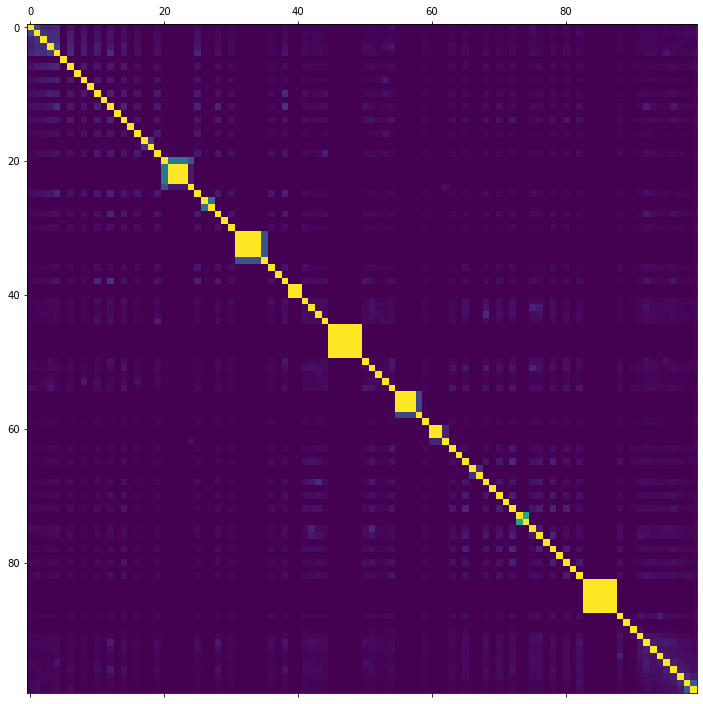

In [201]:
plt.figure(figsize=[12, 12])
plt.matshow(mutual_info, fignum=1)

In [191]:
import sklearn.feature_selection as sk_fs

corr_matrix_sklearn = [sk_fs.mutual_info_classif(seq_matrix, seq_matrix[:, i], discrete_features=True) for i in range(seq_matrix.shape[1])]

In [192]:
corr_matrix_sklearn = np.array(corr_matrix_sklearn)

In [194]:
corr_matrix_sklearn_copy = corr_matrix_sklearn
for i in range(corr_matrix_sklearn_copy.shape[0]):
    corr_matrix_sklearn_copy[i, i] = 0

In [195]:
corr_matrix_sklearn_copy

array([[0.        , 0.27317065, 0.1611702 , ..., 0.01196418, 0.02115188,
        0.01576308],
       [0.27317065, 0.        , 0.27409181, ..., 0.0311959 , 0.03899252,
        0.04336107],
       [0.1611702 , 0.27409181, 0.        , ..., 0.03276788, 0.02463703,
        0.01737793],
       ...,
       [0.01196418, 0.0311959 , 0.03276788, ..., 0.        , 0.23958337,
        0.14403859],
       [0.02115188, 0.03899252, 0.02463703, ..., 0.23958337, 0.        ,
        0.39863665],
       [0.01576308, 0.04336107, 0.01737793, ..., 0.14403859, 0.39863665,
        0.        ]])

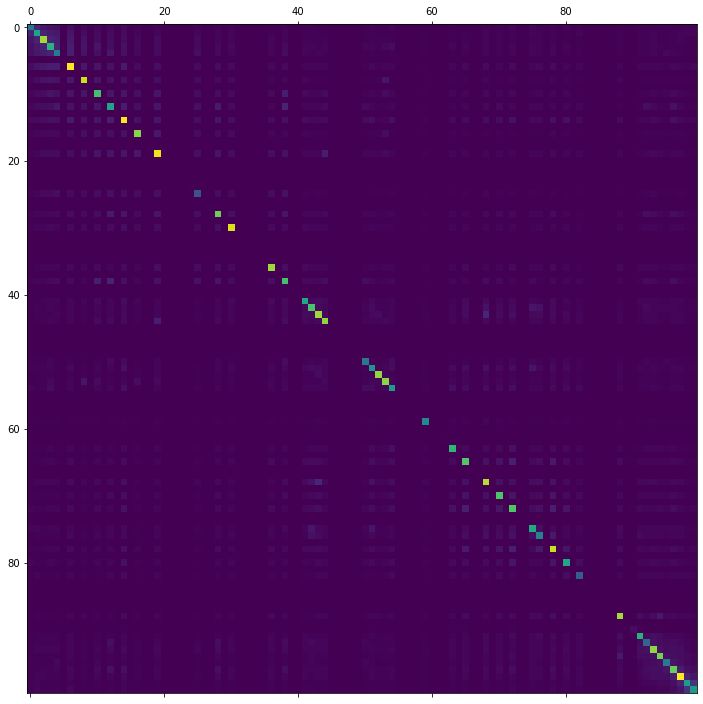

In [193]:
plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix_sklearn, fignum=1)

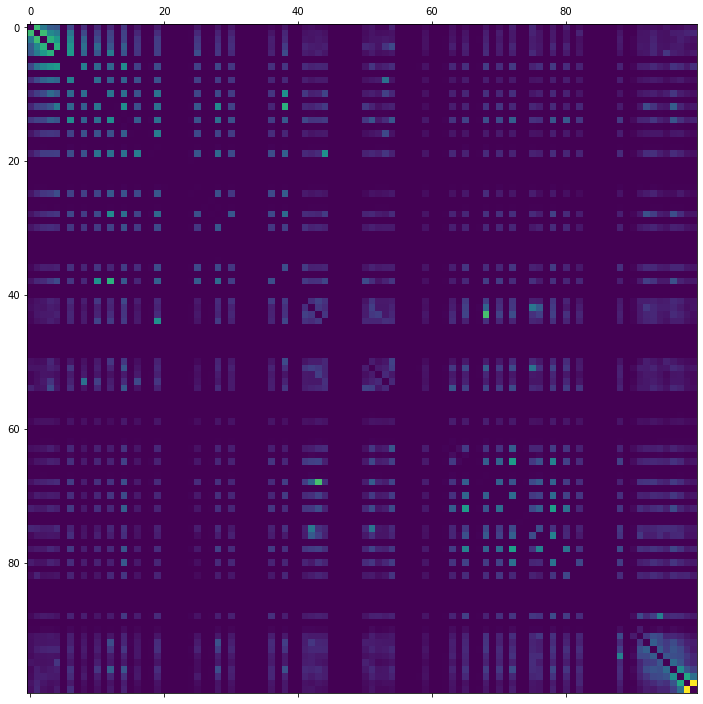

In [196]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix_sklearn_copy, fignum=1)

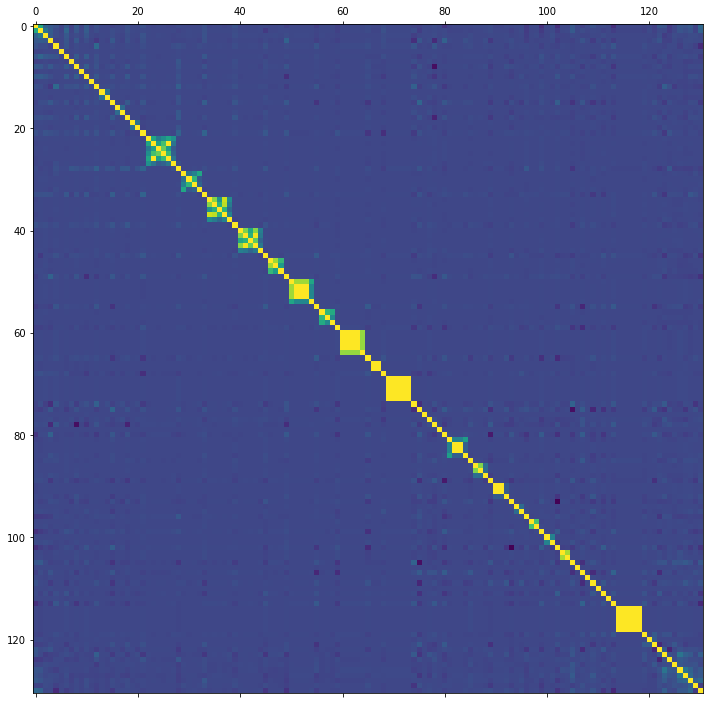

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=[12, 12])
plt.matshow(corr_matrix, fignum=1)

In [147]:
corr_matrix

array([[ 1.        ,  0.49444614,  0.13916209, ...,  0.08127972,
        -0.01330811,  0.15099872],
       [ 0.49444614,  1.        ,  0.22351505, ...,  0.05573445,
        -0.01699031,  0.12830395],
       [ 0.13916209,  0.22351505,  1.        , ...,  0.02402077,
         0.02006779,  0.00503115],
       ...,
       [ 0.08127972,  0.05573445,  0.02402077, ...,  1.        ,
         0.11456332,  0.15831315],
       [-0.01330811, -0.01699031,  0.02006779, ...,  0.11456332,
         1.        , -0.04225423],
       [ 0.15099872,  0.12830395,  0.00503115, ...,  0.15831315,
        -0.04225423,  1.        ]])